Average xG shape: 3.660
Average xGA shape: 3.447


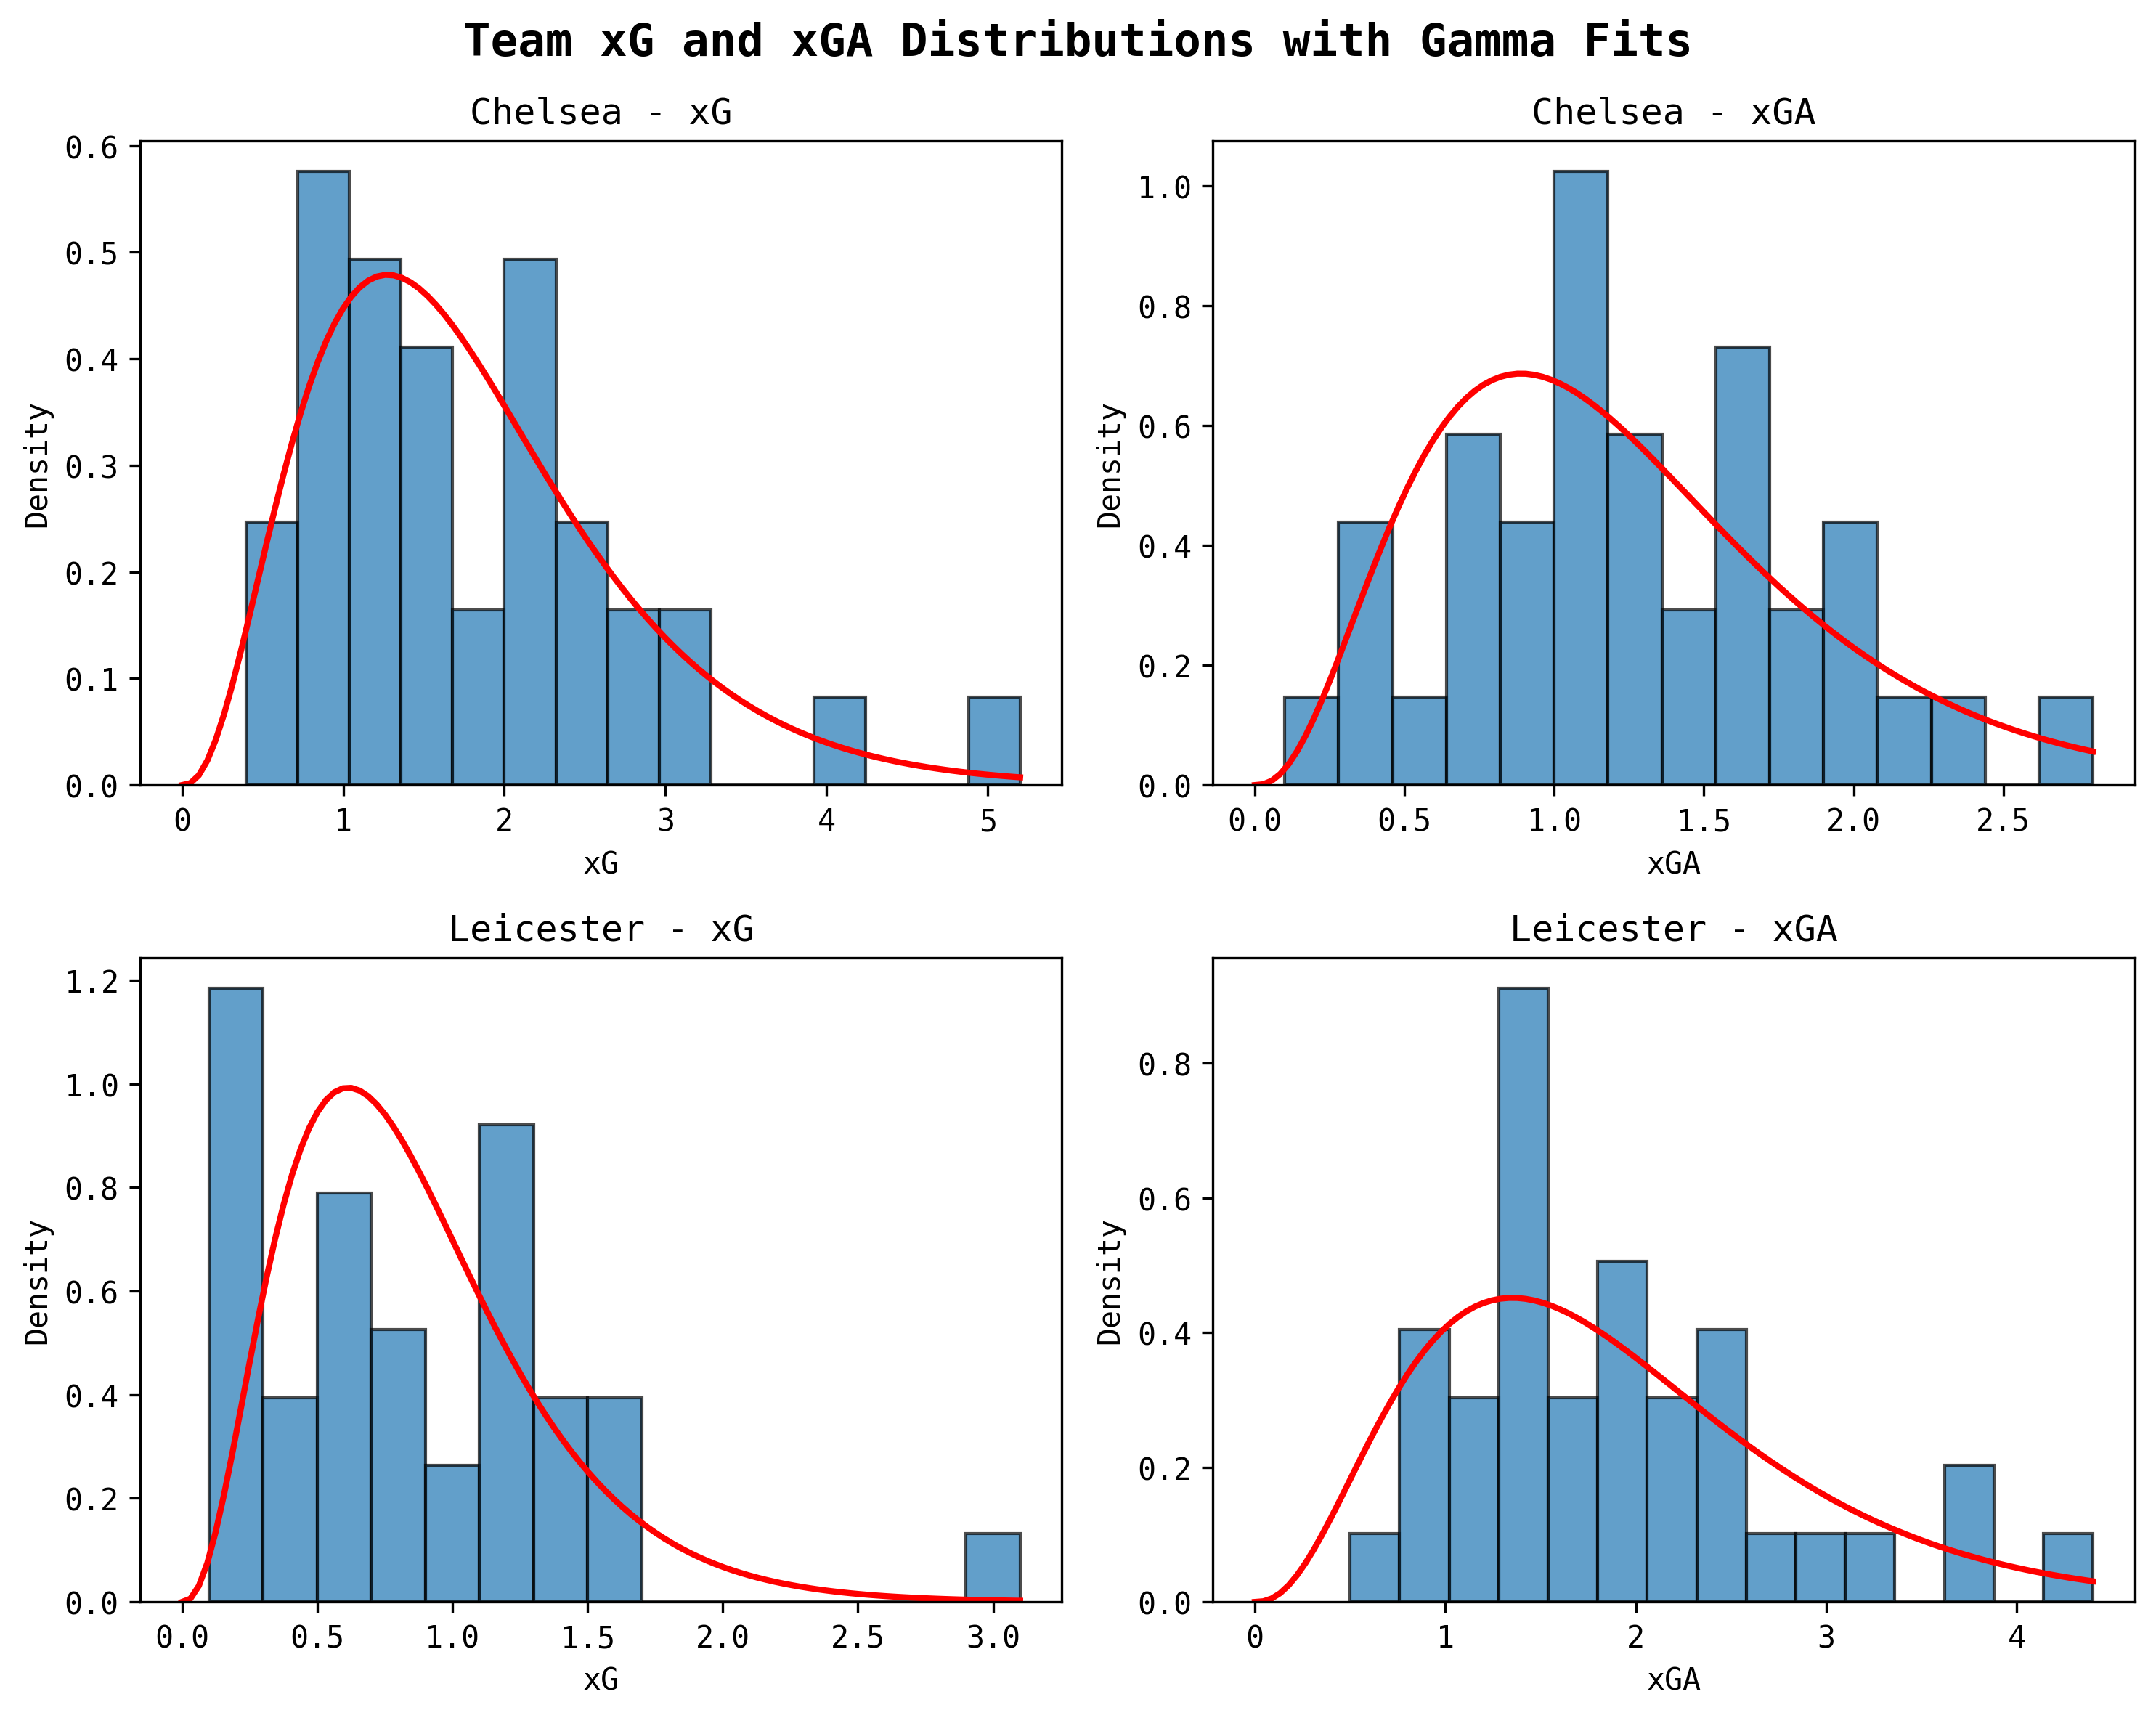

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gamma
import sys
sys.path.append('../../style')
from style_config import StyleConfig

# Apply consistent styling
StyleConfig.apply_style()

# Load data
df = pd.read_csv("xg_totals.csv")

# Get average shape parameters
xg_shapes = []
xga_shapes = []

for team in df['Team'].unique():
    team_data = df[df['Team'] == team]
    
    # Fit gamma distributions (remove zeros/negatives)
    xg_pos = team_data['xG'][team_data['xG'] > 0]
    xga_pos = team_data['xGA'][team_data['xGA'] > 0]
    
    if len(xg_pos) > 1:
        xg_shape = gamma.fit(xg_pos, floc=0)[0]
        xg_shapes.append(xg_shape)
    
    if len(xga_pos) > 1:
        xga_shape = gamma.fit(xga_pos, floc=0)[0]
        xga_shapes.append(xga_shape)

# Average shape parameters
avg_xg_shape = np.mean(xg_shapes)
avg_xga_shape = np.mean(xga_shapes)

print(f"Average xG shape: {avg_xg_shape:.3f}")
print(f"Average xGA shape: {avg_xga_shape:.3f}")

# Get two teams for histograms
teams = ['Chelsea', 'Leicester']

# Create histograms with overlaid gamma distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Team xG and xGA Distributions with Gamma Fits', fontweight='bold', fontsize=15)

for i, team in enumerate(teams):
    team_data = df[df['Team'] == team]
    
    # xG histogram with gamma overlay
    xg_data = team_data['xG'][team_data['xG'] > 0]
    axes[i, 0].hist(xg_data, bins=15, alpha=0.7, density=True, edgecolor='black')
    
    if len(xg_data) > 1:
        # Fit with fixed shape of 3.5
        shape = 3.5
        scale = np.mean(xg_data) / shape  # MLE estimate for scale given shape
        x_range = np.linspace(0, xg_data.max(), 100)
        axes[i, 0].plot(x_range, gamma.pdf(x_range, shape, scale=scale), 'r-', linewidth=2)
    
    axes[i, 0].set_title(f'{team} - xG')
    axes[i, 0].set_xlabel('xG')
    axes[i, 0].set_ylabel('Density')
    
    # xGA histogram with gamma overlay
    xga_data = team_data['xGA'][team_data['xGA'] > 0]
    axes[i, 1].hist(xga_data, bins=15, alpha=0.7, density=True, edgecolor='black')
    
    if len(xga_data) > 1:
        # Fit with fixed shape of 3.5
        shape = 3.5
        scale = np.mean(xga_data) / shape  # MLE estimate for scale given shape
        x_range = np.linspace(0, xga_data.max(), 100)
        axes[i, 1].plot(x_range, gamma.pdf(x_range, shape, scale=scale), 'r-', linewidth=2)
    
    axes[i, 1].set_title(f'{team} - xGA')
    axes[i, 1].set_xlabel('xGA')
    axes[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

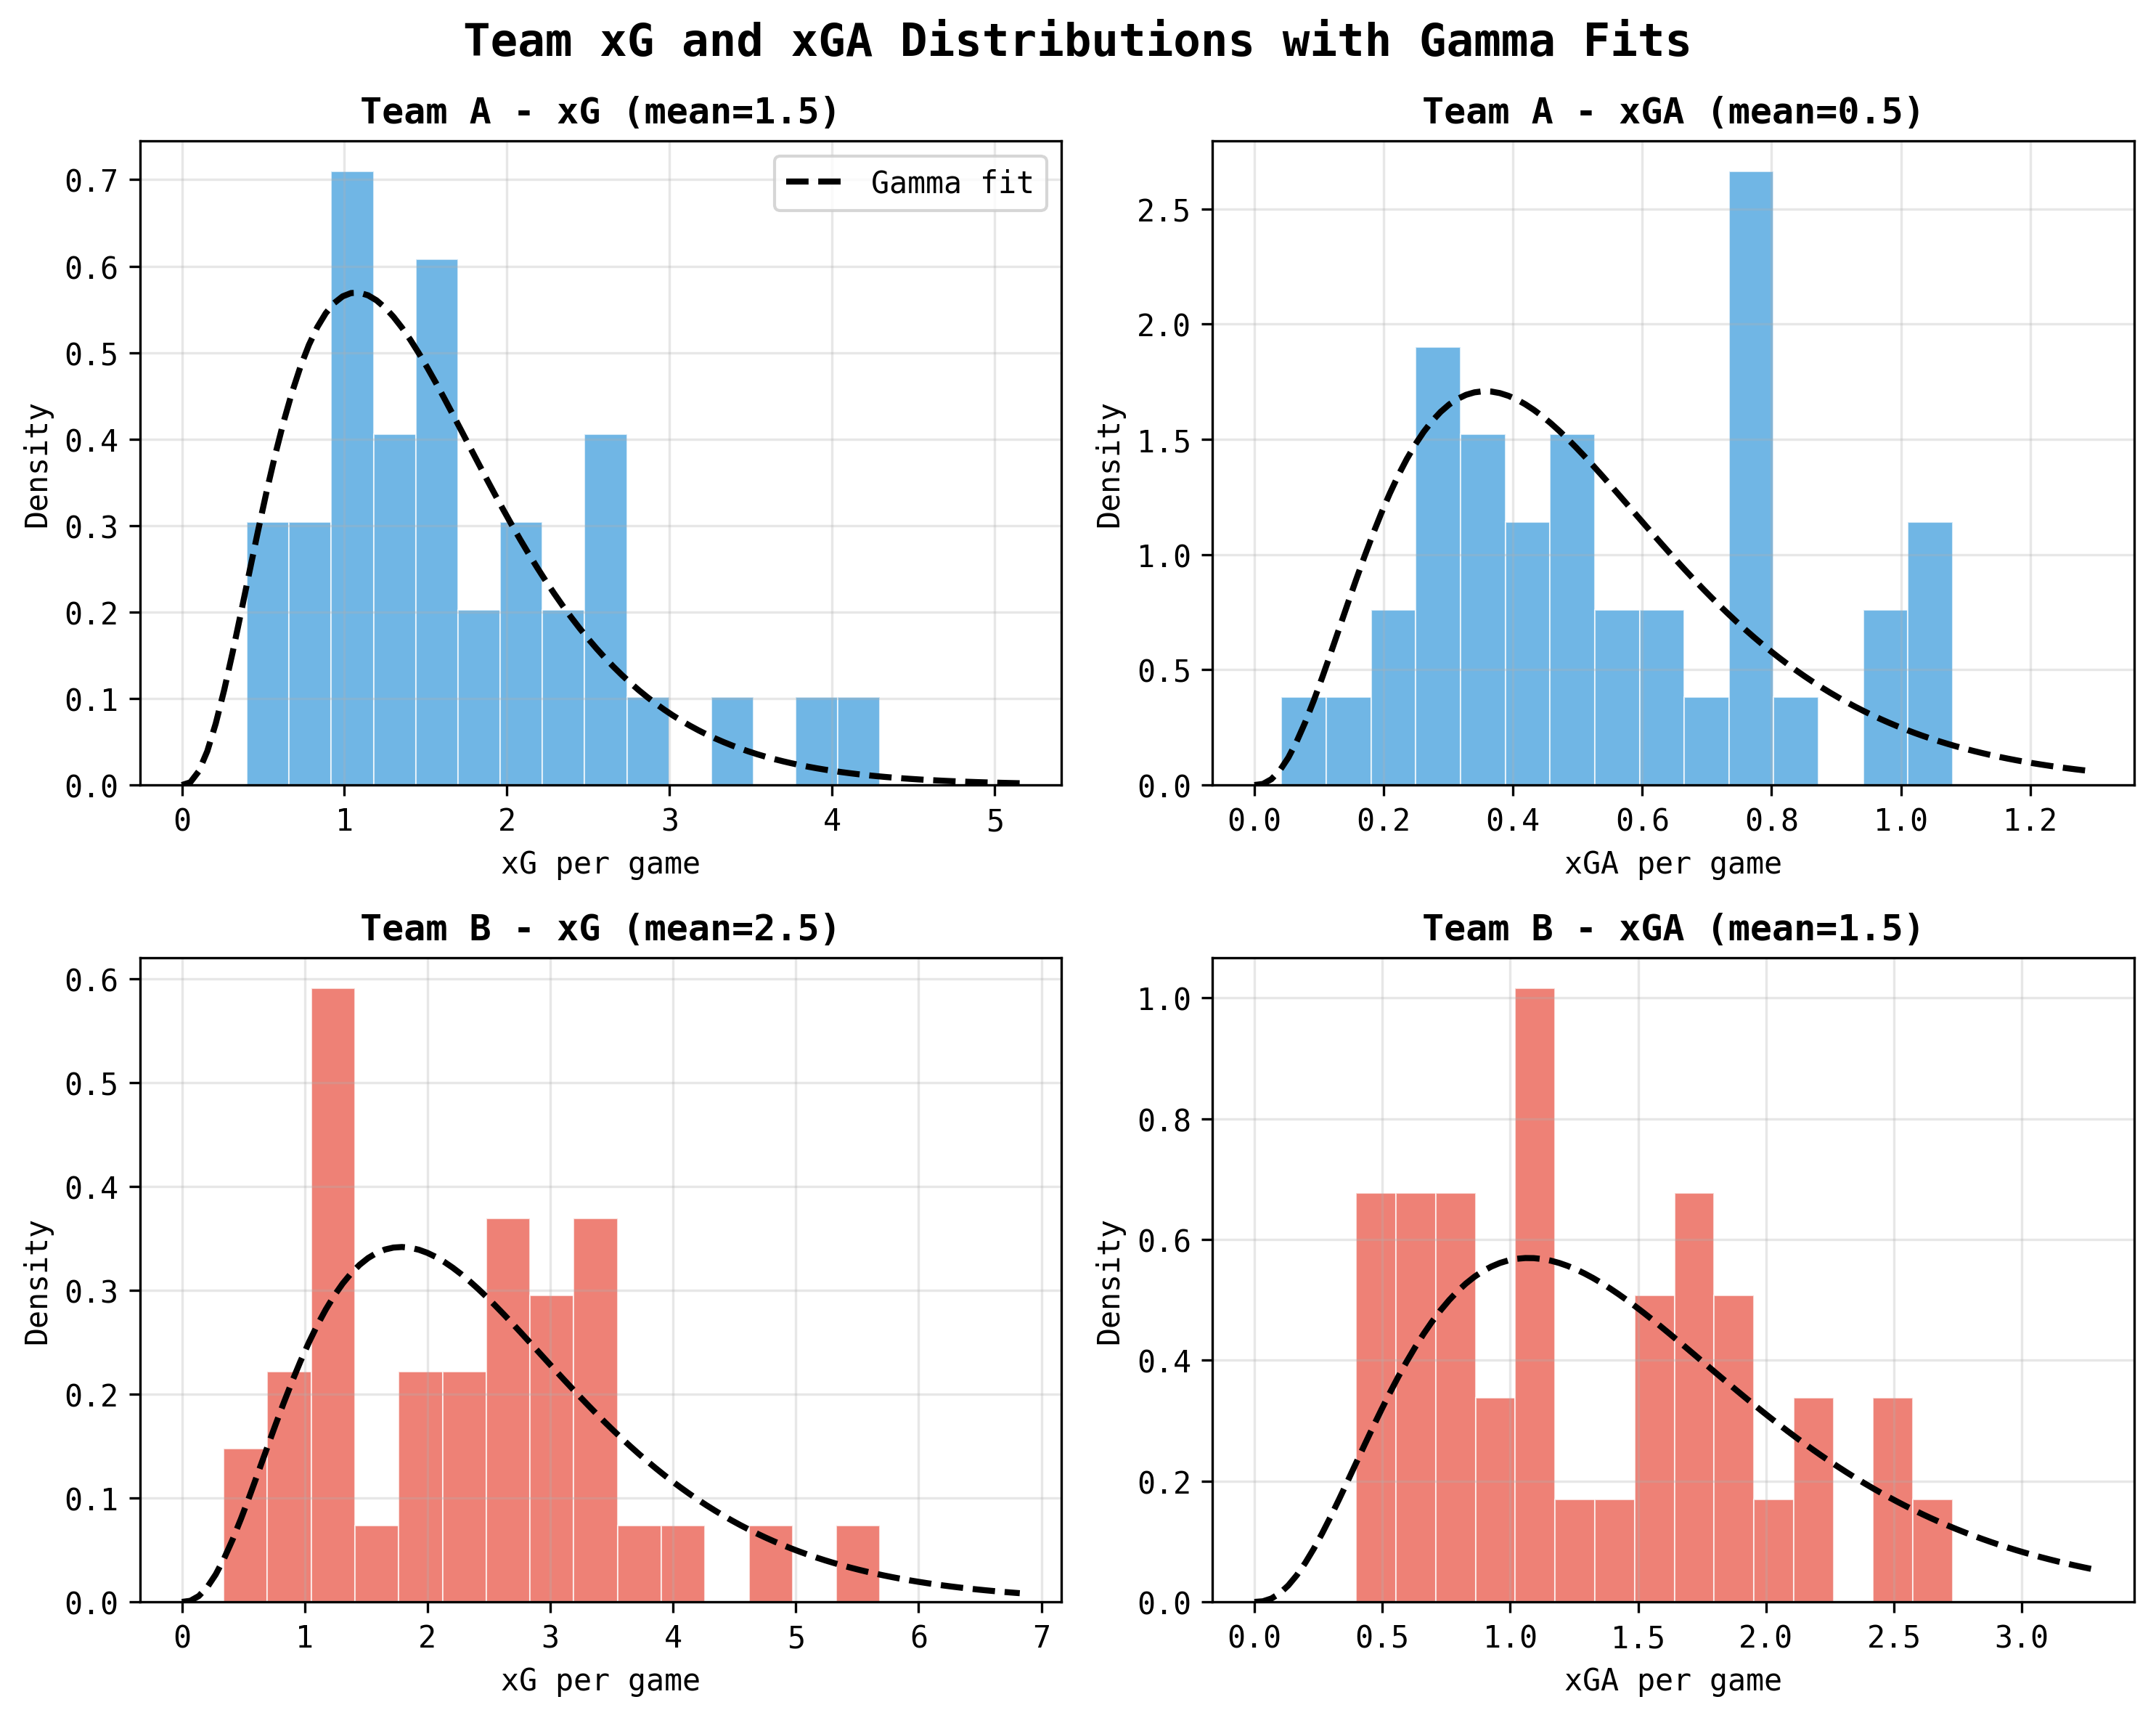

Distribution Parameters:
Shape parameter (both teams): 3.5
Team A - xG scale: 0.429, xGA scale: 0.143
Team B - xG scale: 0.714, xGA scale: 0.429


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Create histograms with overlaid gamma distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Team xG and xGA Distributions with Gamma Fits', fontweight='bold', fontsize=15)

teams = ['Team A', 'Team B']
colors = ['#3498db', '#e74c3c']  # Blue for Team A, Red for Team B (same as simulation)

for i, team in enumerate(teams):
    # Set target means for each team
    if i == 0:  # First team
        target_xg_mean = 1.5
        target_xga_mean = 0.5
    else:  # Second team
        target_xg_mean = 2.5
        target_xga_mean = 1.5
    
    # Generate sample data from gamma distributions
    shape = 3.5
    n_samples = 38  # Number of games to simulate
    
    # Generate xG data
    xg_scale = target_xg_mean / shape
    xg_data = np.random.gamma(shape, xg_scale, n_samples)
    
    # Generate xGA data  
    xga_scale = target_xga_mean / shape
    xga_data = np.random.gamma(shape, xga_scale, n_samples)
    
    # xG histogram with gamma overlay
    axes[i, 0].hist(xg_data, bins=15, alpha=0.7, density=True, color=colors[i], edgecolor='white', linewidth=0.5)
    x_range = np.linspace(0, xg_data.max() * 1.2, 100)
    axes[i, 0].plot(x_range, gamma.pdf(x_range, shape, scale=xg_scale), color='black', linewidth=2, linestyle='--')
    axes[i, 0].set_title(f'{team} - xG (mean={target_xg_mean})', fontweight='bold')
    axes[i, 0].set_xlabel('xG per game')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, alpha=0.3)
    
    # xGA histogram with gamma overlay
    axes[i, 1].hist(xga_data, bins=15, alpha=0.7, density=True, color=colors[i], edgecolor='white', linewidth=0.5)
    x_range = np.linspace(0, xga_data.max() * 1.2, 100)
    axes[i, 1].plot(x_range, gamma.pdf(x_range, shape, scale=xga_scale), color='black', linewidth=2, linestyle='--')
    axes[i, 1].set_title(f'{team} - xGA (mean={target_xga_mean})', fontweight='bold')
    axes[i, 1].set_xlabel('xGA per game')
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].grid(True, alpha=0.3)

# Add a legend for the gamma fit line
axes[0, 0].plot([], [], color='black', linewidth=2, linestyle='--', label='Gamma fit')
axes[0, 0].legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print some additional info about the distributions
print("Distribution Parameters:")
print("Shape parameter (both teams): 3.5")
print(f"Team A - xG scale: {1.5/3.5:.3f}, xGA scale: {0.5/3.5:.3f}")
print(f"Team B - xG scale: {2.5/3.5:.3f}, xGA scale: {1.5/3.5:.3f}")

=== SIMULATION RESULTS (10,000 seasons) ===

Team A (Target: 1.5 xG, 0.5 xGA):
  Average Points: 76.5 (Range: 47-103)
  Average xG: 57.0
  Average xGA: 19.0
  Average Goals For: 56.9
  Average Goals Against: 19.0
  Seasons finished 1st: 6971

Team B (Target: 2.5 xG, 1.5 xGA):
  Average Points: 70.4 (Range: 38-101)
  Average xG: 94.9
  Average xGA: 57.1
  Average Goals For: 94.9
  Average Goals Against: 57.0
  Seasons finished 1st: 2715

=== HEAD-TO-HEAD ===
Team A wins: 6971 (69.7%)
Team B wins: 2715 (27.1%)
Equal points: 314 (3.1%)


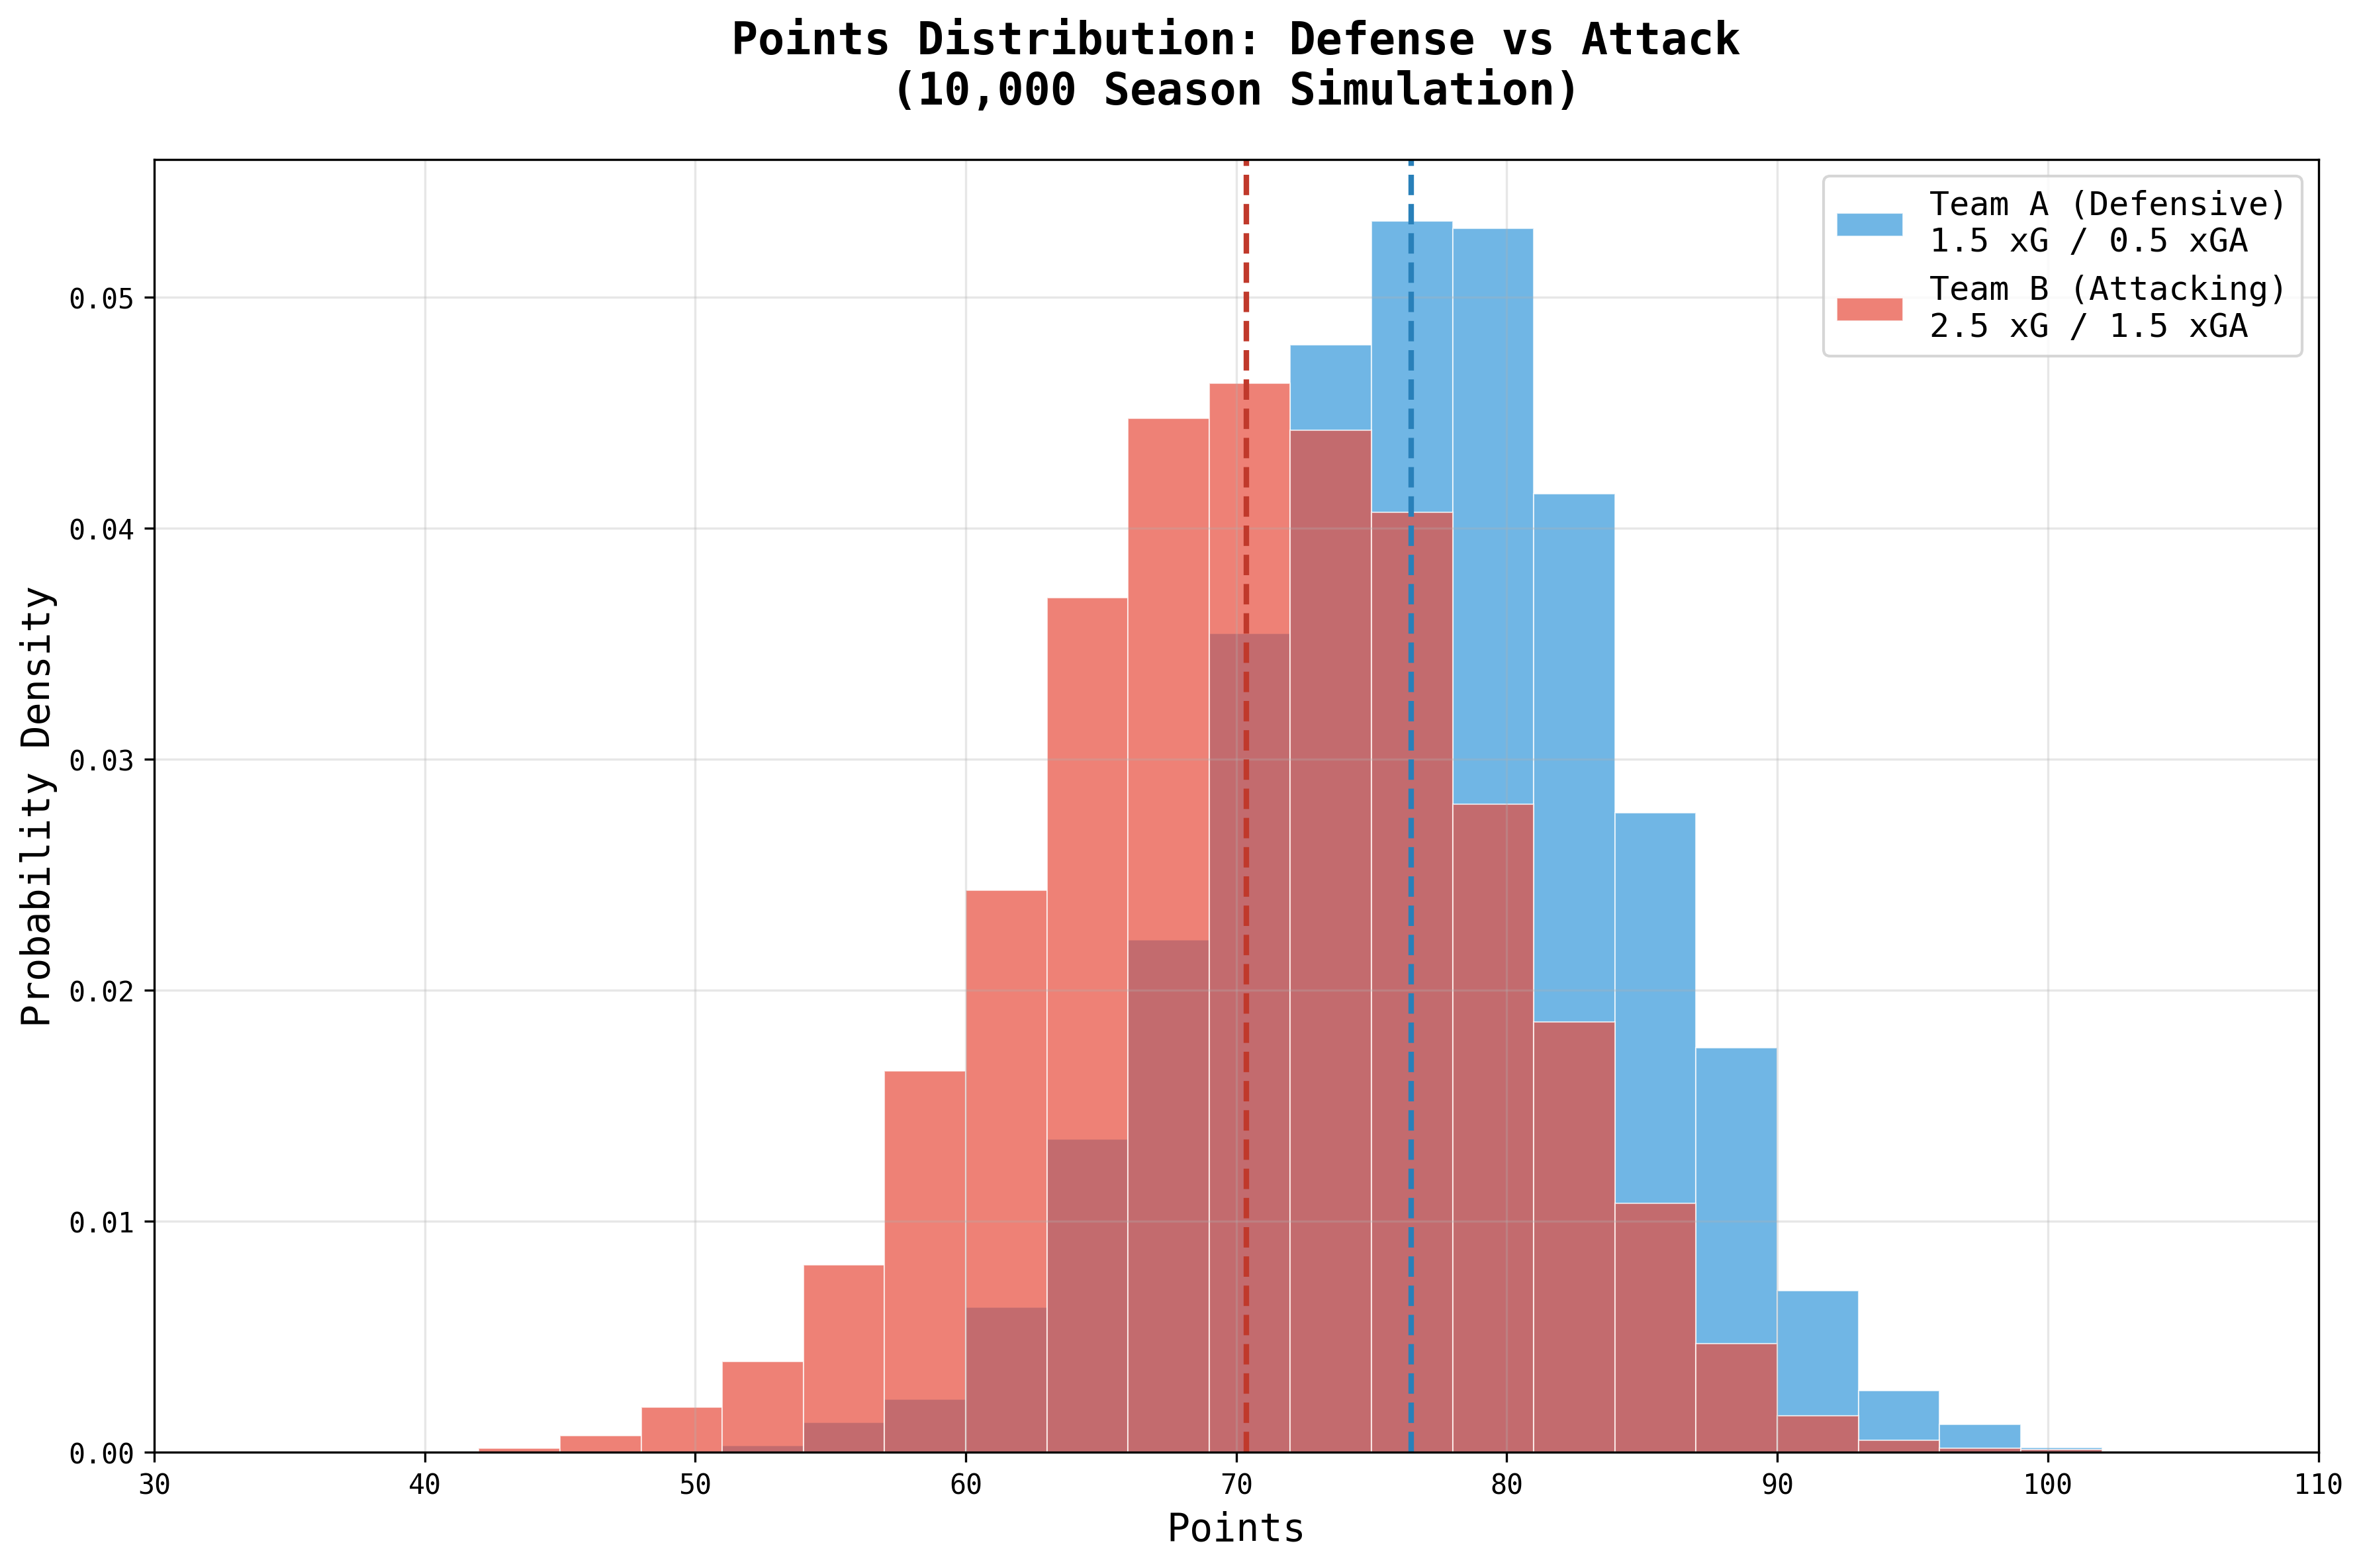

In [77]:
import numpy as np
import matplotlib.pyplot as plt

teams = ['Team A', 'Team B']
n_simulations = 10000
simulation_results = {team: {'points': [], 'xg_total': [], 'xga_total': [], 'gf_total': [], 'ga_total': []} for team in teams}

for sim in range(n_simulations):
    season_results = {}
    
    for i, team in enumerate(teams):
        # Set target means for each team
        if i == 0:  # Team A (defensive)
            target_xg_mean = 1.5
            target_xga_mean = 0.5
        else:  # Team B (attacking)
            target_xg_mean = 2.5
            target_xga_mean = 1.5
        
        # Generate sample data from gamma distributions
        shape = 3.5
        n_samples = 38  # Number of games to simulate
        
        # Generate xG data
        xg_scale = target_xg_mean / shape
        xg_data = np.random.gamma(shape, xg_scale, n_samples)
        
        # Generate xGA data  
        xga_scale = target_xga_mean / shape
        xga_data = np.random.gamma(shape, xga_scale, n_samples)
        
        # Convert xG/xGA to actual goals using Poisson distribution
        goals_for = np.random.poisson(xg_data)
        goals_against = np.random.poisson(xga_data)
        
        # Calculate points for each match
        points = []
        for gf, ga in zip(goals_for, goals_against):
            if gf > ga:  # Win
                points.append(3)
            elif gf == ga:  # Draw
                points.append(1)
            else:  # Loss
                points.append(0)
        
        season_results[team] = {
            'xg_total': xg_data.sum(),
            'xga_total': xga_data.sum(),
            'goals_for': goals_for.sum(),
            'goals_against': goals_against.sum(),
            'total_points': sum(points)
        }
    
    # Store results for this simulation
    for team in teams:
        simulation_results[team]['points'].append(season_results[team]['total_points'])
        simulation_results[team]['xg_total'].append(season_results[team]['xg_total'])
        simulation_results[team]['xga_total'].append(season_results[team]['xga_total'])
        simulation_results[team]['gf_total'].append(season_results[team]['goals_for'])
        simulation_results[team]['ga_total'].append(season_results[team]['goals_against'])

# Calculate and display summary statistics
print("=== SIMULATION RESULTS (10,000 seasons) ===\n")

for team in teams:
    points = np.array(simulation_results[team]['points'])
    xg_total = np.array(simulation_results[team]['xg_total'])
    xga_total = np.array(simulation_results[team]['xga_total'])
    gf_total = np.array(simulation_results[team]['gf_total'])
    ga_total = np.array(simulation_results[team]['ga_total'])
    
    print(f"{team} (Target: {1.5 if team == 'Team A' else 2.5} xG, {0.5 if team == 'Team A' else 1.5} xGA):")
    print(f"  Average Points: {points.mean():.1f} (Range: {points.min()}-{points.max()})")
    print(f"  Average xG: {xg_total.mean():.1f}")
    print(f"  Average xGA: {xga_total.mean():.1f}")
    print(f"  Average Goals For: {gf_total.mean():.1f}")
    print(f"  Average Goals Against: {ga_total.mean():.1f}")
    print(f"  Seasons finished 1st: {sum(simulation_results['Team A']['points'][i] < points[i] if team == 'Team B' else simulation_results['Team B']['points'][i] < points[i] for i in range(n_simulations))}")
    print()

# Head-to-head comparison
team_a_wins = sum(1 for i in range(n_simulations) if simulation_results['Team A']['points'][i] > simulation_results['Team B']['points'][i])
team_b_wins = sum(1 for i in range(n_simulations) if simulation_results['Team B']['points'][i] > simulation_results['Team A']['points'][i])
draws = n_simulations - team_a_wins - team_b_wins

print("=== HEAD-TO-HEAD ===")
print(f"Team A wins: {team_a_wins} ({team_a_wins/100:.1f}%)")
print(f"Team B wins: {team_b_wins} ({team_b_wins/100:.1f}%)")
print(f"Equal points: {draws} ({draws/100:.1f}%)")

# VISUALIZATION: Points Distribution
plt.figure(figsize=(12, 8))

# Create histogram data
team_a_points = np.array(simulation_results['Team A']['points'])
team_b_points = np.array(simulation_results['Team B']['points'])

# Create bins for better visualization
bins = np.arange(30, 115, 3)  # 3-point bins from 30 to 114

# Plot overlapping histograms
plt.hist(team_a_points, bins=bins, alpha=0.7, label='Team A (Defensive)\n1.5 xG / 0.5 xGA', 
         color='#3498db', density=True, edgecolor='white', linewidth=0.5)
plt.hist(team_b_points, bins=bins, alpha=0.7, label='Team B (Attacking)\n2.5 xG / 1.5 xGA', 
         color='#e74c3c', density=True, edgecolor='white', linewidth=0.5)

# Add vertical lines for averages
plt.axvline(team_a_points.mean(), color='#2980b9', linestyle='--', linewidth=2, 
            )
plt.axvline(team_b_points.mean(), color='#c0392b', linestyle='--', linewidth=2, 
           )

# Formatting
plt.xlabel('Points', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Points Distribution: Defense vs Attack\n(10,000 Season Simulation)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(30, 110)
plt.tight_layout()
plt.show()